In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")
df = data.dropna(subset = ["shot_made_flag"])

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


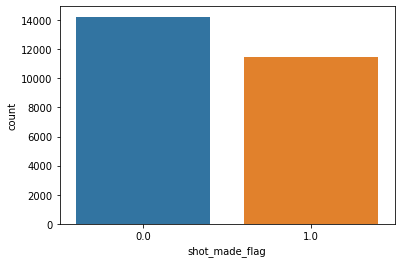

In [68]:
# Distribution of shots made vs. missed
sns.countplot(df.shot_made_flag)
plt.savefig('shots_distribution.png')

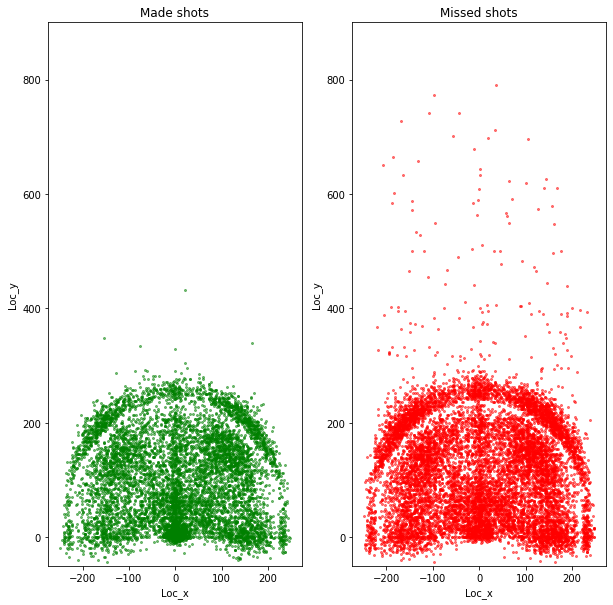

In [9]:
# Plot graph of made and missed shots 
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Made shots')
plt.xlabel('Loc_x')
plt.ylabel('Loc_y')
made = df.loc[df.shot_made_flag == 1]
plt.scatter(made.loc_x, made.loc_y, color = 'green', s = 4, alpha = 0.5)
ax = plt.gca()
ax.set_ylim([-50, 900])

plt.subplot(122)
plt.title('Missed shots')
plt.xlabel('Loc_x')
plt.ylabel('Loc_y')
missed = df.loc[df.shot_made_flag == 0]
plt.scatter(missed.loc_x, missed.loc_y, color = 'red', s = 4, alpha = 0.5)
ax = plt.gca()
ax.set_ylim([-50, 900])

plt.savefig('shots_court.png')

In [55]:
# Define function to get accuracy against different variables
def accuracy(df, variable):
    ct = pd.crosstab(df.shot_made_flag, df[variable])
    ct = ct.apply(lambda x:x/x.sum(), axis=0)
    x = ct.columns 
    y = ct.values[1, :]
    plt.figure(figsize=(7, 5))
    plt.plot(x, y, color = 'blue')
    plt.xlabel(variable)
    plt.ylabel('Accuracy (%)')
    if variable == 'opponent':
        plt.rc('xtick', labelsize = 8)
    else:
        plt.rc('xtick', labelsize = 10)
    plt.xticks(rotation=45)
    plt.title('Accuracy vs. ' + variable)
    plt.savefig(variable + '_accuracy.png')

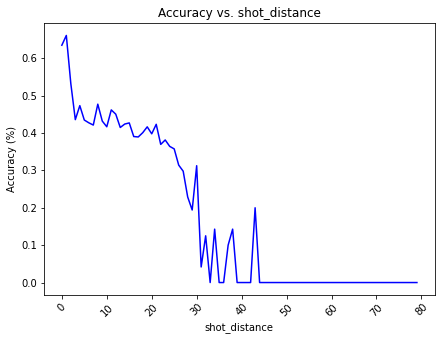

In [56]:
accuracy(df, 'shot_distance')

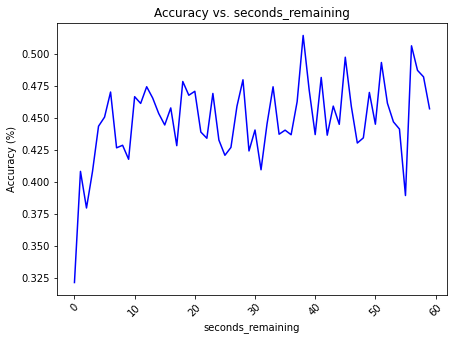

In [57]:
accuracy(df, 'seconds_remaining')

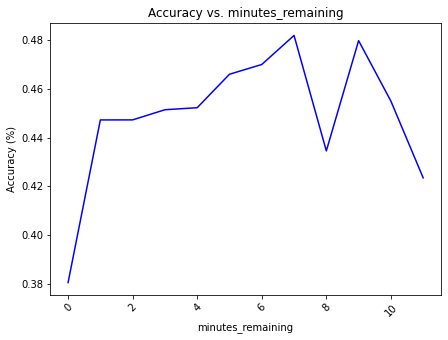

In [58]:
accuracy(df, 'minutes_remaining')

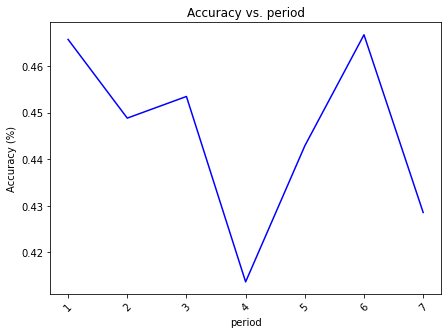

In [59]:
accuracy(df, 'period')

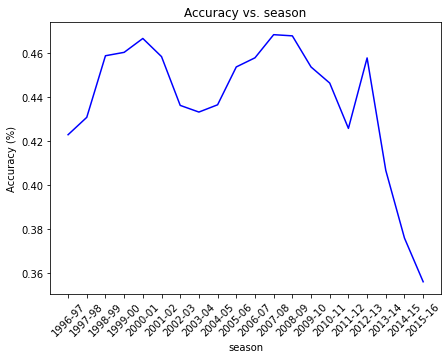

In [60]:
accuracy(df, 'season')

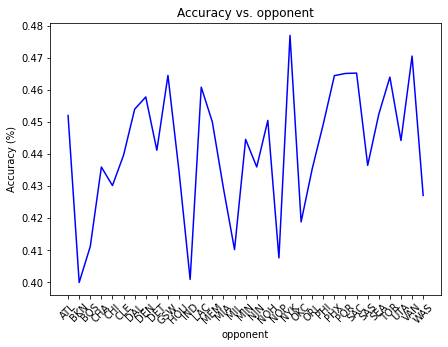

In [61]:
accuracy(df, 'opponent')

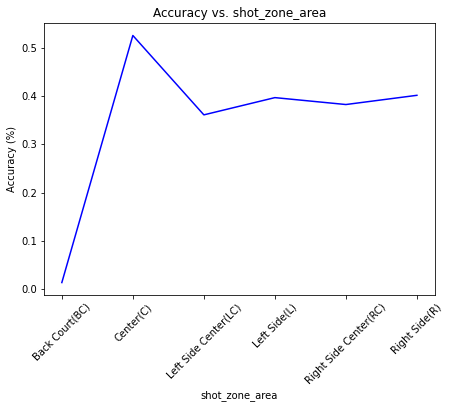

In [63]:
accuracy(df, 'shot_zone_area')

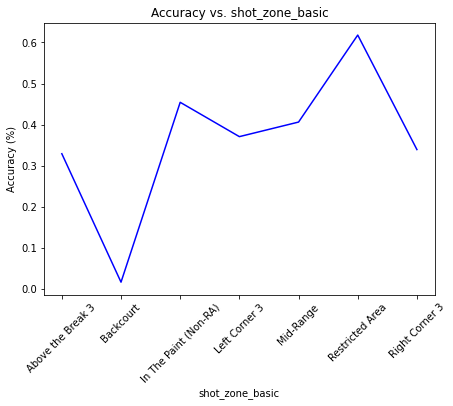

In [64]:
accuracy(df, 'shot_zone_basic')

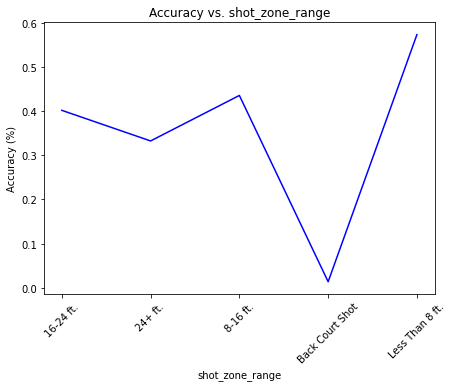

In [65]:
accuracy(df, 'shot_zone_range')

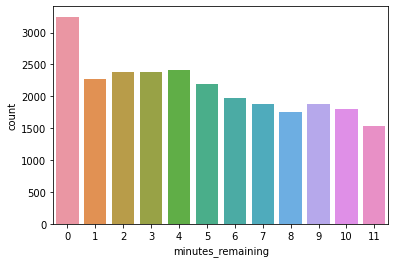

In [69]:
# Distribution of shots vs. minutes_remaining
sns.countplot(df.minutes_remaining)
plt.savefig('minutes_remaining_distribution.png')

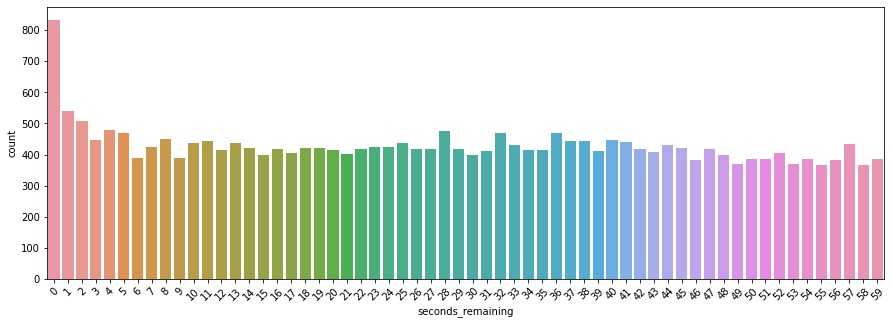

In [73]:
# Distribution of shots vs. seconds_remaining
plt.figure(figsize=(15,5))
chart = sns.countplot(df.seconds_remaining)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.savefig('seconds_remaining_distribution.png')

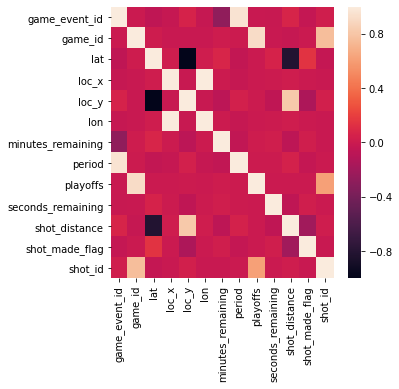

In [81]:
# Correlation Matrix
plt.figure(figsize=(5,5))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('correlation_matrix.png')